# Solution to Exercise 2 (Nov. 4, 2021)

In [1]:
# Importing numpy for calculations and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt

# 1. Fitting a parabolic model

The general form of a parabola can be written as $y(x) = a + b \cdot x + c \cdot x^2$.

Given are 25 measurements of a parabolic process, which are generated in the cell below (**do not change this cell**). You could think of them as "synthetic measurements", i.e. no real measurements from the field, but simulation results for feasibility studies for example. (The benefit of synthetic measurements is that we can compare our estimated model parameters to the true ones to evaulate the goodness of our inversion. This is something that is not possible in the field.)

In [2]:
np.random.seed(23) # Make sure we always get the same random numbers
x = np.linspace(-15, 5, 25)
d_orig = -1.2 + 9.3 * x + 1.2 * x**2
d = d_orig + np.random.normal(scale=5, size=25)

**a)** Construct the forward operator (i.e., the $\mathbf{G}$ matrix).

In [3]:
G = np.array([np.ones_like(x), x, x**2]).T

**b)** Estimate $\mathbf{m}_\mathrm{est}$ for the given data.

We will be using the exact same function to solve the over-determined problem as in the previous exercise, available in the `myfunctions.py` file.

In [4]:
from myfunctions import least_squares

m_est = least_squares(G, d)

m_est: [-1.46026495  9.67796114  1.23302332]


**c)** Plot measurement data and predicted data (i.e., the model response) and calculate the RMS error bewteen both quantities.

4.391975698223422

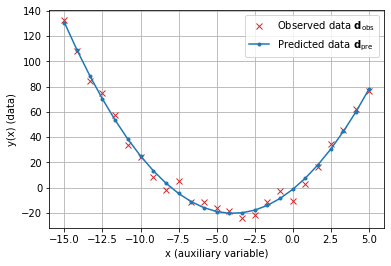

In [5]:
from myfunctions import plot, RMSE
plot(d, x, m_est, G)
RMSE(d, G @ m_est)

**d)** What happens if you try to solve the problem above only using the first five measurements?

m_est: [309.30311905  55.40084378   2.90645741]


259.3853250856139

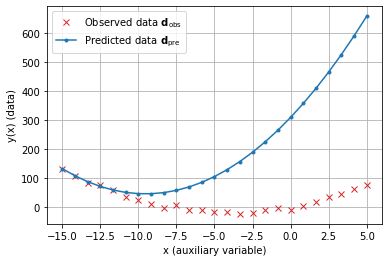

In [6]:
m_est_small = least_squares(G[:5], d[:5])
plot(d, x, m_est_small, G)
RMSE(d, G @ m_est_small)

**e)** Now solve the problem only using the first and the last measurement.

In [7]:
# Estimate model parameters
measurements = [0, -1]
x0 = x[measurements]
d0 = d[measurements]
G0 = G[measurements]

Since we are now left with two measurements only, but still have 3 parameters, the problem becomes under-determined. It can be solved with the minimum-norm solution:

$$\mathbf{m}_\mathrm{est} = \mathbf{G}^T \left[ \mathbf{G} \mathbf{G}^T \right]^{-1} \mathbf{d}$$

In [8]:
m_est0 = G0.T @ np.linalg.inv(G0 @ G0.T) @ d0

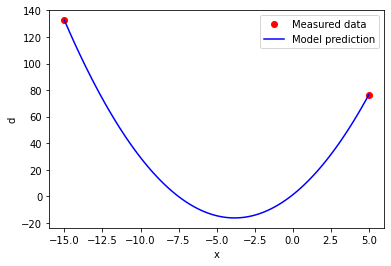

In [9]:
# Evaluate and plot model response
x_s0 = np.linspace(x0[0], x0[-1], 100)
d_pre0 = m_est0[0] + m_est0[1] * x_s0 + m_est0[2] * x_s0**2

# Plot
plt.plot(x0, d0, "ro", label="Measured data")
plt.plot(x_s0, d_pre0, "b-", label="Model prediction")
plt.xlabel("x")
plt.ylabel("d")
plt.legend()

---

## Bonus question
### The effect of data noise.

Revisit the first exercise from last week (i.e., the linear fit). We can also create our own, synthetic measurement data and check our model predictions for different noise nevels. We do this by first creating noise-free data, and then adding randomly distributed noise drawn from Numpy's [random](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html?highlight=rand%20normal#numpy.random.normal) module. 

First, create noise-free, synthetic data for the process $d(x) = 2.1*x + 5$.

Then add noise of different levels (`scale` argument) to the noise-free data. Invert the noisified data and visualize the results for different noise levels. Does the RMS, i.e. your data fit, get worse?

In [10]:
d_orig = 2.1 * x + 5

G = np.array((x, np.ones(len(x)))).T

m_est: [2.09542746 5.07054689]
m_est: [2.58935615 9.89213884]
m_est: [2.17504649 7.99928482]


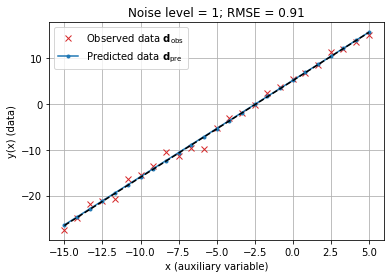

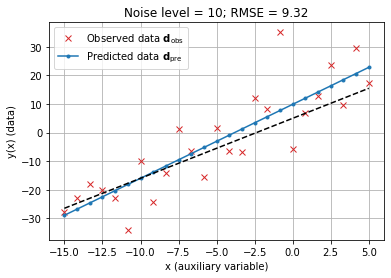

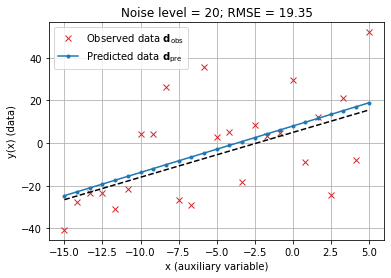

In [11]:
def inv(noise=5):
    d = d_orig + np.random.normal(scale=noise, size=25)
    m_est = least_squares(G, d)
    ax = plot(d, x, m_est, G)
    ax.plot(x, d_orig, "k--")
    rms = RMSE(d, G @ m_est)
    ax.set_title("Noise level = %i; RMSE = %.2f" % (noise, rms))
    
for noise in 1, 10, 20:
    inv(noise)